In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from os import path, getcwd, chdir
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [14]:
from google.colab import files
uploaded = files.upload()

Saving combined.csv to combined (1).csv


In [15]:
#reading dataset
dataset = pd.read_csv('combined (1).csv')
dataset = dataset.dropna()
X=dataset.iloc[:,0:10]
y=dataset.iloc[:,10:12]
#X=dataset.iloc[:, 0:2]
#y=dataset.iloc[:,3:6]
X=X.values.tolist()

y=y.values.tolist()

print(len(X))

109508


In [16]:
print(X[0:1])

[[168, 488, 640, 264, 520, 352, 232, 264, 488, 88]]


In [17]:
print(y[0:5])

[[131.7813933, 54.21695574], [130.1206938, 52.40972388], [125.4805039, 52.99585314], [129.9741615, 53.87504701], [132.8559636, 54.21695574]]


In [18]:
Dia_max=dataset['Diastole'].max()
Dia_min=dataset['Diastole'].min()
Sys_max=dataset['Systol'].max()
Sys_min=dataset['Systol'].min()
print(Sys_min)

72.43713733


In [19]:
#normalizing the data
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
y=scaler.fit_transform(y)
print(y)

[[0.46849209 0.03820924]
 [0.45538173 0.02183417]
 [0.41874984 0.027145  ]
 ...
 [0.13216493 0.07997628]
 [0.13216493 0.07855867]
 [0.13216493 0.07572346]]


In [20]:
print(y.max())

1.0


In [21]:
#splitting the data into test train and validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=45)

In [22]:
#generating model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100,activation=tf.nn.relu,input_shape=(10,)),
        tf.keras.layers.Dense(50,activation=tf.nn.relu),
        tf.keras.layers.Dense(40,activation=tf.nn.relu),
        tf.keras.layers.Dense(30,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.relu),
        tf.keras.layers.Dense(2,activation=tf.nn.sigmoid)
    ])

In [23]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1100      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 40)                2040      
                                                                 
 dense_9 (Dense)             (None, 30)                1230      
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 9,752
Trainable params: 9,752
Non-traina

In [24]:
#compiling the model
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                  optimizer='rmsprop',
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [25]:
#model fitting on training data and evaluation on test data 
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100)

#print(history.epoch, history.history['accuracy'][-1])
model.evaluate(X_test,y_test)

Epoch 1/100
2054/2054 [==============================] - 6s 3ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - val_loss: 0.1055 - val_mean_absolute_error: 0.1055
Epoch 2/100
2054/2054 [==============================] - 6s 3ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - val_loss: 0.1058 - val_mean_absolute_error: 0.1058
Epoch 3/100
2054/2054 [==============================] - 6s 3ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - val_loss: 0.0929 - val_mean_absolute_error: 0.0929
Epoch 4/100
2054/2054 [==============================] - 6s 3ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - val_loss: 0.0937 - val_mean_absolute_error: 0.0937
Epoch 5/100
2054/2054 [==============================] - 5s 3ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901
Epoch 6/100
2054/2054 [==============================] - 6s 3ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - val_loss: 0.0936 - val_mean_absolute_error: 0.093

[0.07416801154613495, 0.07416801154613495]

In [26]:
model.evaluate(X_test,y_test)

685/685 [==============================] - 1s 2ms/step - loss: 0.0742 - mean_absolute_error: 0.0742


[0.07416801154613495, 0.07416801154613495]

In [27]:
#model evaluation on validation data
model.evaluate(X_val,y_val)

685/685 [==============================] - 2s 3ms/step - loss: 0.0747 - mean_absolute_error: 0.0747


[0.07470771670341492, 0.07470771670341492]

In [28]:
#predicting the values from test dataset
import matplotlib.pyplot as plt
import numpy as np
test = X_test
predictions = model.predict(test)
print(test)

[[0.32142857 0.25619835 0.23333333 ... 0.45454545 0.18875502 0.15909091]
 [0.23214286 0.27272727 0.23333333 ... 0.48051948 0.19678715 0.11363636]
 [0.21428571 0.17355372 0.14583333 ... 0.07792208 0.18072289 0.20454545]
 ...
 [0.28571429 0.18595041 0.1625     ... 0.4025974  0.15261044 0.11363636]
 [0.26785714 0.23140496 0.19583333 ... 0.32467532 0.20080321 0.15909091]
 [0.30357143 0.2107438  0.18333333 ... 0.41558442 0.17269076 0.13636364]]


In [ ]:
#actual output of test data
print(y_test)

[[0.39953396 0.53077262]
 [0.37019124 0.51723963]
 [0.36007203 0.49210694]
 ...
 [0.33428397 0.4822106 ]
 [0.35162537 0.47772824]
 [0.33137407 0.47375524]]


In [ ]:
#predicted output values
print(predictions)

[[0.38289368 0.50398016]
 [0.3715445  0.48663342]
 [0.3768202  0.49109906]
 ...
 [0.30671227 0.4765059 ]
 [0.33175942 0.47860515]
 [0.3232888  0.47768492]]


In [ ]:
#converting normalized output into original values 
for i in y_test:
    print(((float(i[0])*(Sys_max-Sys_min))+Sys_min),((float(i[1])*(Dia_max-Dia_min))+Dia_min))

157.4419859 104.93220030000003
145.1726445 96.19513121
140.9414067 79.96914565999998
115.2286651 64.84900901000003
122.80863290000002 73.82658481000004
123.00594229999999 72.88936535000005
107.2376361 73.79369991000004
130.9805289 69.42000914000005
139.7279104 73.26754162000003
114.8998162 77.92075398000003
122.3811293 72.23166749
134.7622916 73.28398407000003
125.8998129 76.86843741000001
118.92821560000002 70.65319262999998
149.0044734 77.74743380000001
147.9185805 141.62789069999997
137.9192413 72.72494089000003
125.78471580000001 69.02539043000002
109.26005699999999 75.94766040000002
120.96707890000002 79.43345906000002
101.61431939999997 64.24063849000004
104.60684470000001 66.29594430999998
121.7234315 70.25857391
104.09712879999998 68.74586884000001
111.97306070000002 73.08667471000001
119.35571919999998 64.07621403000002
138.5075089 78.50880697000002
121.50967970000002 71.60685453000002
103.63674030000001 73.11955961000001
97.89832648999999 72.75782578000002
110.03285199999999 

In [ ]:
for i in predictions:
    print(((float(i[0])*(Sys_max-Sys_min))+Sys_min),((float(i[1])*(Dia_max-Dia_min))+Dia_min))

150.48403451609516 87.63464982668557
145.7385008278176 76.43537459884487
147.9444764592921 79.31844816289345
125.71065763504023 71.78136248680181
121.91669806535191 69.9331145757426
122.68098800185504 69.99591640775935
118.53608710966293 70.30842478876917
121.28610777550537 69.66622603042873
123.33818363661834 67.2895692000447
125.8807573812293 70.68081040667732
116.19872967422717 70.88593612087175
123.55476485191252 69.89424824587928
120.16614113894889 69.11009117975095
122.62661839067388 70.63005328876676
153.41732675462643 93.85522516206566
149.39924675012415 80.90340555026478
125.8807573812293 70.68081040667732
117.7564196576435 69.68342726750683
121.98483765598647 71.47891702189025
119.04337066042223 66.53034815545243
116.93065704363485 69.43558707197747
114.42886985354966 68.84820523135022
112.07476413541218 70.26332445352182
111.84461232498245 66.85911497642985
120.01568074807074 67.55726585716758
114.54688044669325 69.02937620263384
148.3807293468076 95.68733007770146
115.74620

In [ ]:
print(history.history)


In [30]:
#plotting graphs to analyze model

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
root_mean_squared_error = history_dict['mean_absolute_error']
val_root_mean_squared_error = history_dict['val_mean_absolute_error']

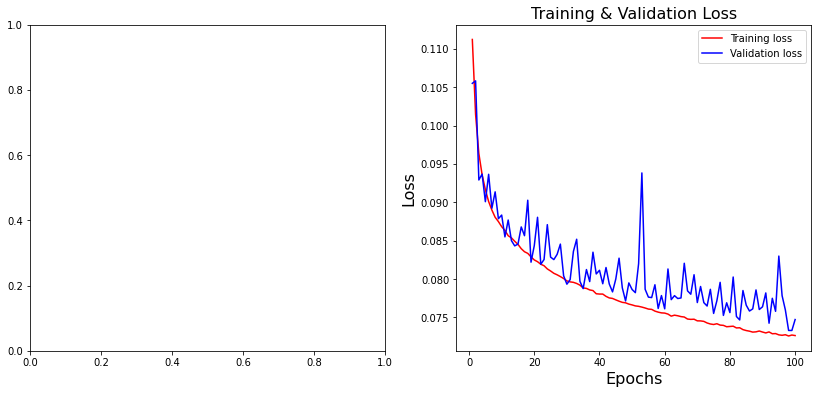

In [32]:
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[1].plot(epochs, loss_values, 'red', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()
